In [91]:
import re
import unicodedata
import pandas as pd
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from prepare import full_clean
 
from env import get_db_url

# 1. Load the spam data set.

In [2]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df_spam = pd.read_sql(sql, url, index_col="id")
df_spam.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

##### First, clean and prepare the text

In [3]:
cleantext = []
for row in df_spam.index:
    clean = full_clean(df_spam.iloc[row]['text'])
    cleantext.append(clean)    

Removed 4 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 23 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 2 stopwords
Removed 17 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 20 stopwords
Removed 22 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 16 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 21 stopwords
Removed 8 stopwords
Removed 17 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 7 stopwords
Remov

Removed 9 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 21 stopwords
Removed 23 stopwords
Removed 1 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 14 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 22 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 

Removed 6 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 16 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 2 s

Removed 6 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 16 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 14 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 sto

Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 25 stopwords
Removed 22 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 13 stopwords
Removed 2 stopwords
Removed 20 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 27 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 29 stopwords
Removed 27 stopwords
Removed 20 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 

Removed 9 stopwords
Removed 6 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 19 stopwords
Removed 5 stopwords
Removed 21 stopwords
Removed 17 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 23 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 11 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 3 stopwords
Removed 16 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 19 stopwords
Removed 

Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 26 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 18 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 19 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 14 st

Removed 5 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 18 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 36 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 s

Removed 0 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 18 stopwords
Removed 39 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 59 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 27 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 10

Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 15 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 14 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 7 

In [4]:
clean_text = pd.DataFrame(cleantext)

In [5]:
clean_text = clean_text.rename(columns = {0:'cleaned'})

In [6]:
df_spam = df_spam.reset_index().drop(columns='id')

In [7]:
df_sc = df_spam.join(clean_text)

In [52]:
df_sc

,label,text,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity wa mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like ' interested buying so...


### Bigrams

In [76]:
df_sc_ham = df_sc[df_sc.label == 'ham']
df_sc_spam = df_sc[df_sc.label == 'spam']

In [77]:
ham_words = ' '.join(df_sc_ham.cleaned).split()
spam_words = ' '.join(df_sc_spam.cleaned).split()
all_words = ' '.join(df_sc.cleaned).split()

In [78]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [89]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts.sort_values(by='all').tail(10)

,all,ham,spam
ltgt,276,276,0
ok,277,272,5
4,288,169,119
go,304,273,31
ur,384,240,144
get,397,314,83
2,478,305,173
call,600,241,359
u,1214,1054,160
',1871,1744,127


#### Spam:

In [70]:
bigrams = []

for row in df_sc_spam.cleaned:
    row_bigrams = nltk.ngrams(row.split(), 2)
    bigrams.append(list(row_bigrams))

In [71]:
bigrams

[[('free', 'entry'),
  ('entry', '2'),
  ('2', 'wkly'),
  ('wkly', 'comp'),
  ('comp', 'win'),
  ('win', 'fa'),
  ('fa', 'cup'),
  ('cup', 'final'),
  ('final', 'tkts'),
  ('tkts', '21st'),
  ('21st', 'may'),
  ('may', '2005'),
  ('2005', 'text'),
  ('text', 'fa'),
  ('fa', '87121'),
  ('87121', 'receive'),
  ('receive', 'entry'),
  ('entry', 'questionstd'),
  ('questionstd', 'txt'),
  ('txt', 'ratetc'),
  ('ratetc', "'"),
  ("'", 'apply'),
  ('apply', '08452810075over18'),
  ('08452810075over18', "'")],
 [('freemsg', 'hey'),
  ('hey', 'darling'),
  ('darling', "'"),
  ("'", '3'),
  ('3', 'week'),
  ('week', "'"),
  ("'", 'word'),
  ('word', 'back'),
  ('back', "'"),
  ("'", 'like'),
  ('like', 'fun'),
  ('fun', 'still'),
  ('still', 'tb'),
  ('tb', 'ok'),
  ('ok', 'xxx'),
  ('xxx', 'std'),
  ('std', 'chgs'),
  ('chgs', 'send'),
  ('send', 'a150'),
  ('a150', 'rcv')],
 [('winner', 'valued'),
  ('valued', 'network'),
  ('network', 'customer'),
  ('customer', 'selected'),
  ('selected', 

In [72]:
import numpy as np
bigramslist = np.concatenate(bigrams)

In [73]:
kn = list(nltk.ngrams(list(bigramslist.flat), 2))

In [74]:
kn

[('free', 'entry'),
 ('entry', 'entry'),
 ('entry', '2'),
 ('2', '2'),
 ('2', 'wkly'),
 ('wkly', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'comp'),
 ('comp', 'win'),
 ('win', 'win'),
 ('win', 'fa'),
 ('fa', 'fa'),
 ('fa', 'cup'),
 ('cup', 'cup'),
 ('cup', 'final'),
 ('final', 'final'),
 ('final', 'tkts'),
 ('tkts', 'tkts'),
 ('tkts', '21st'),
 ('21st', '21st'),
 ('21st', 'may'),
 ('may', 'may'),
 ('may', '2005'),
 ('2005', '2005'),
 ('2005', 'text'),
 ('text', 'text'),
 ('text', 'fa'),
 ('fa', 'fa'),
 ('fa', '87121'),
 ('87121', '87121'),
 ('87121', 'receive'),
 ('receive', 'receive'),
 ('receive', 'entry'),
 ('entry', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'txt'),
 ('txt', 'ratetc'),
 ('ratetc', 'ratetc'),
 ('ratetc', "'"),
 ("'", "'"),
 ("'", 'apply'),
 ('apply', 'apply'),
 ('apply', '08452810075over18'),
 ('08452810075over18', '08452810075over18'),
 ('08452810075over18', "'"),
 ("'", 'freemsg'),
 ('freemsg', 'hey'),
 ('hey

In [75]:
counter = 1
new_list = []
for pair in kn:
    if counter % 2 == 1:
        new_list.append(pair)
    counter += 1
new_list        

[('free', 'entry'),
 ('entry', '2'),
 ('2', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetc'),
 ('ratetc', "'"),
 ("'", 'apply'),
 ('apply', '08452810075over18'),
 ('08452810075over18', "'"),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', "'"),
 ("'", '3'),
 ('3', 'week'),
 ('week', "'"),
 ("'", 'word'),
 ('word', 'back'),
 ('back', "'"),
 ("'", 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'a150'),
 ('a150', 'rcv'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'a900'),
 ('a900', 'priz

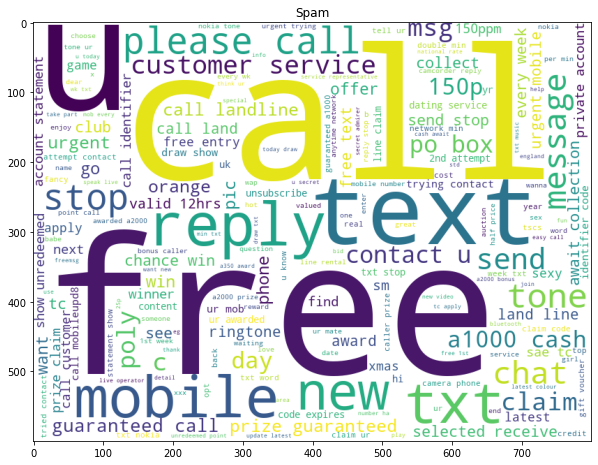

In [93]:
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))

plt.imshow(spam_cloud)

plt.title('Spam')
plt.show()

#### Ham:

In [94]:
df_bigrams = []

for row in df_sc_spam.cleaned:
    row_bigrams = nltk.ngrams(row.split(), 2)
    bigrams.append(list(row_bigrams))
    
bigramslist = np.concatenate(bigrams)

ok = list(nltk.ngrams(list(bigramslist.flat), 2))

In [97]:
counter = 1
new_list_2 = []
for pair in ok:
    if counter % 2 == 1:
        new_list_2.append(pair)
    counter += 1
new_list_2  

[('free', 'entry'),
 ('entry', '2'),
 ('2', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetc'),
 ('ratetc', "'"),
 ("'", 'apply'),
 ('apply', '08452810075over18'),
 ('08452810075over18', "'"),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', "'"),
 ("'", '3'),
 ('3', 'week'),
 ('week', "'"),
 ("'", 'word'),
 ('word', 'back'),
 ('back', "'"),
 ("'", 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'a150'),
 ('a150', 'rcv'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'a900'),
 ('a900', 'priz

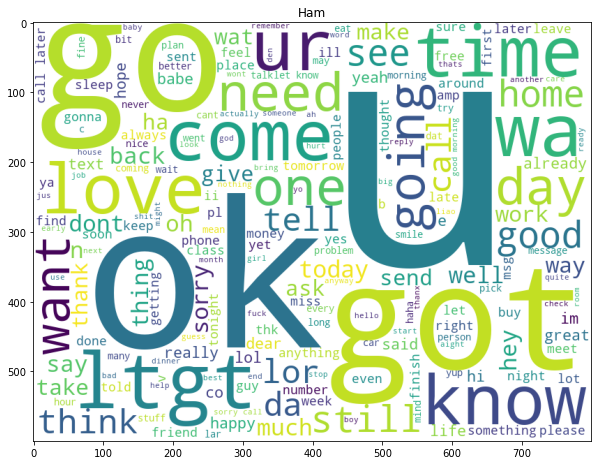

In [98]:
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))

plt.figure(figsize=(10, 8))

plt.imshow(ham_cloud)

plt.title('Ham')
plt.show()

## Is there any overlap in the bigrams for the spam data and the ham data?

##### Really only appears to be the letter 'u'

## Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

#### Spam:

In [99]:
trigrams = []

for row in df_sc_spam.cleaned:
    row_trigrams = nltk.ngrams(row.split(), 3)
    trigrams.append(list(row_trigrams))

In [100]:
trigrams

[[('free', 'entry', '2'),
  ('entry', '2', 'wkly'),
  ('2', 'wkly', 'comp'),
  ('wkly', 'comp', 'win'),
  ('comp', 'win', 'fa'),
  ('win', 'fa', 'cup'),
  ('fa', 'cup', 'final'),
  ('cup', 'final', 'tkts'),
  ('final', 'tkts', '21st'),
  ('tkts', '21st', 'may'),
  ('21st', 'may', '2005'),
  ('may', '2005', 'text'),
  ('2005', 'text', 'fa'),
  ('text', 'fa', '87121'),
  ('fa', '87121', 'receive'),
  ('87121', 'receive', 'entry'),
  ('receive', 'entry', 'questionstd'),
  ('entry', 'questionstd', 'txt'),
  ('questionstd', 'txt', 'ratetc'),
  ('txt', 'ratetc', "'"),
  ('ratetc', "'", 'apply'),
  ("'", 'apply', '08452810075over18'),
  ('apply', '08452810075over18', "'")],
 [('freemsg', 'hey', 'darling'),
  ('hey', 'darling', "'"),
  ('darling', "'", '3'),
  ("'", '3', 'week'),
  ('3', 'week', "'"),
  ('week', "'", 'word'),
  ("'", 'word', 'back'),
  ('word', 'back', "'"),
  ('back', "'", 'like'),
  ("'", 'like', 'fun'),
  ('like', 'fun', 'still'),
  ('fun', 'still', 'tb'),
  ('still', 'tb',

In [104]:
trigramslist = ''.join(trigrams)

TypeError: sequence item 0: expected str instance, list found

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [ ]:
from acquire import acquire_codeup_blog

In [ ]:
df_blog = pd.DataFrame(acquire_codeup_blog())
df_blog.head()

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [ ]:
from acquire import get_news_articles

In [ ]:
df_articles = pd.DataFrame(get_news_articles())
df_articles.head()